In [21]:

import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.models import Sequential, Model,load_model
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model

In [22]:
# load dataset
(train_x, train_y), (test_x, test_y) = keras.datasets.cifar10.load_data()

# normalize to range 0-1
train_x = train_x / 255.0
test_x = test_x / 255.0

val_x = train_x[:5000]
val_y = train_y[:5000]

In [23]:
def id_block(X, f, filters):
   
    X_shortcut = X
    
    X = Conv2D(filters=filters, kernel_size=(1, 1), strides=(1, 1), padding='same', kernel_initializer=glorot_uniform(seed=0))(X)
    # X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    
    
    X = Conv2D(filters=filters, kernel_size=(f, f), strides=(1, 1), padding='same', kernel_initializer=glorot_uniform(seed=0))(X)
    # X = BatchNormalization(axis=3)(X)

    X = Add()([X, X_shortcut])# SKIP Connection
    X = Activation('relu')(X)

    return X

In [24]:
 def conv_block(X, f, filters, s=2):
    
    X_shortcut = X

    X = Conv2D(filters=filters, kernel_size=(1, 1), strides=(s, s), padding='valid', kernel_initializer=glorot_uniform(seed=0))(X)
    # X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=filters, kernel_size=(f, f), strides=(1, 1), padding='same', kernel_initializer=glorot_uniform(seed=0))(X)
    # X = BatchNormalization(axis=3)(X)

    X_shortcut = Conv2D(filters=filters, kernel_size=(1, 1), strides=(s, s), padding='valid', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    # X_shortcut = BatchNormalization(axis=3)(X_shortcut)

    
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

# Correction Experiment 3

## archi 1

In [5]:
def ResNet():
    X_input = X = Input([32, 32, 3])
    X = Conv2D(18, kernel_size=2, strides=2, activation='relu', padding='same')(X)
    X = AveragePooling2D(pool_size=3, strides=1, padding='same')(X)
    X = conv_block(X, 3, 36, 2)
    X = id_block(X, 4, 36)
    X = conv_block(X, 3, 72, 1)
    X = id_block(X, 4, 72)
    X = id_block(X, 7, 72)
    X = conv_block(X, 3, 144 , 2)
    model = Model(inputs=X_input, outputs=X)
    return model

In [6]:
Input = ResNet()
head_model = Input.output
head_model = Flatten()(head_model)
head_model = Dense(500, activation='tanh')(head_model)
head_model = Dense(250, activation='selu')(head_model)
head_model = Dense(100, activation='tanh')(head_model)    
head_model = Dense(50, activation='selu')(head_model)
head_model = Dense(10, activation='softmax')(head_model)
model = Model(inputs=Input.input, outputs=head_model)
model.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

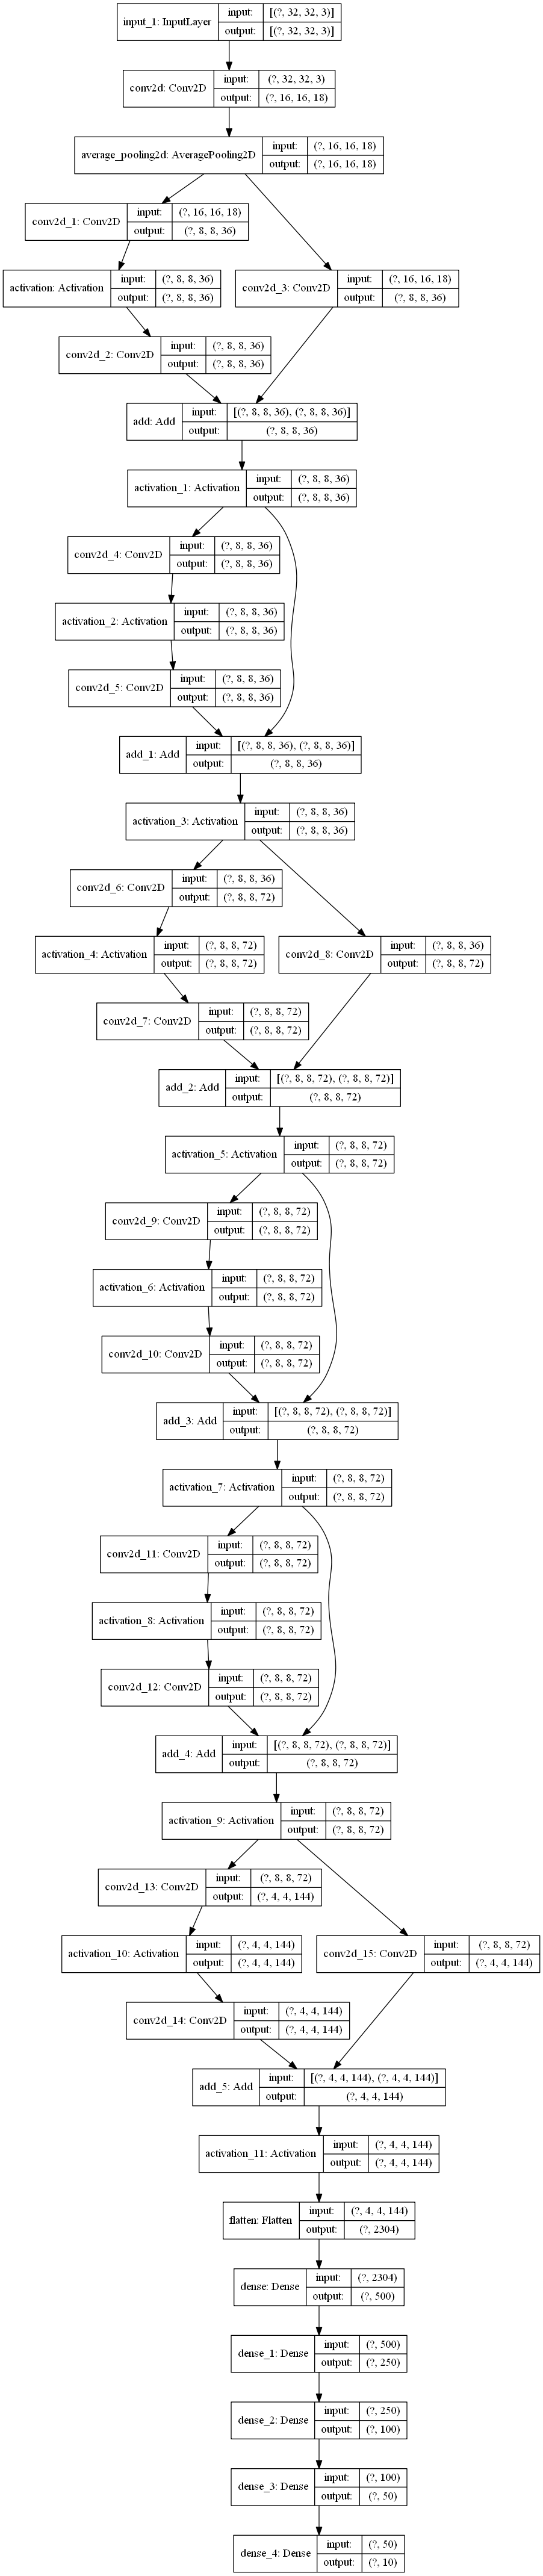

In [7]:
plot_model(model, show_shapes=True)

In [8]:
model.fit(train_x, train_y, epochs=5, validation_data=(val_x, val_y))

Train on 50000 samples, validate on 5000 samples
Epoch 1/5
50000/50000 [==============================] - 111s 2ms/sample - loss: 1.6309 - accuracy: 0.4044 - val_loss: 1.3885 - val_accuracy: 0.4934
Epoch 2/5
50000/50000 [==============================] - 168s 3ms/sample - loss: 1.3731 - accuracy: 0.5060 - val_loss: 1.2330 - val_accuracy: 0.5580
Epoch 3/5
50000/50000 [==============================] - 168s 3ms/sample - loss: 1.2570 - accuracy: 0.5540 - val_loss: 1.1597 - val_accuracy: 0.5958
Epoch 4/5
50000/50000 [==============================] - 169s 3ms/sample - loss: 1.1690 - accuracy: 0.5854 - val_loss: 1.1372 - val_accuracy: 0.5944
Epoch 5/5
50000/50000 [==============================] - 169s 3ms/sample - loss: 1.0936 - accuracy: 0.6154 - val_loss: 0.9686 - val_accuracy: 0.6630


In [9]:
model.evaluate(test_x, test_y)

10000/10000 [==============================] - 11s 1ms/sample - loss: 1.2078 - accuracy: 0.5795


[1.2078063020706176, 0.5795]

In [10]:
model.evaluate(train_x, train_y)

50000/50000 [==============================] - 53s 1ms/sample - loss: 0.9887 - accuracy: 0.6546


[0.9887088064193725, 0.65464]

## archi 7

In [25]:
def ResNet():
    X_input = X = Input([32, 32, 3])
    X = Conv2D(18, kernel_size=6, strides=5, activation='selu', padding='same')(X)
    X = AveragePooling2D(pool_size=3, strides=1, padding='same')(X)
    X = id_block(X, 2, 18)
    X = conv_block(X, 6, 36, 2)
    model = Model(inputs=X_input, outputs=X)
    return model

In [26]:
Input = ResNet()
head_model = Input.output
head_model = Flatten()(head_model)
head_model = Dense(250, activation='selu')(head_model)
head_model = Dense(120, activation='selu')(head_model)
head_model = Dense(60, activation='tanh')(head_model)
head_model = Dense(10, activation='softmax')(head_model)
model = Model(inputs=Input.input, outputs=head_model)
model.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

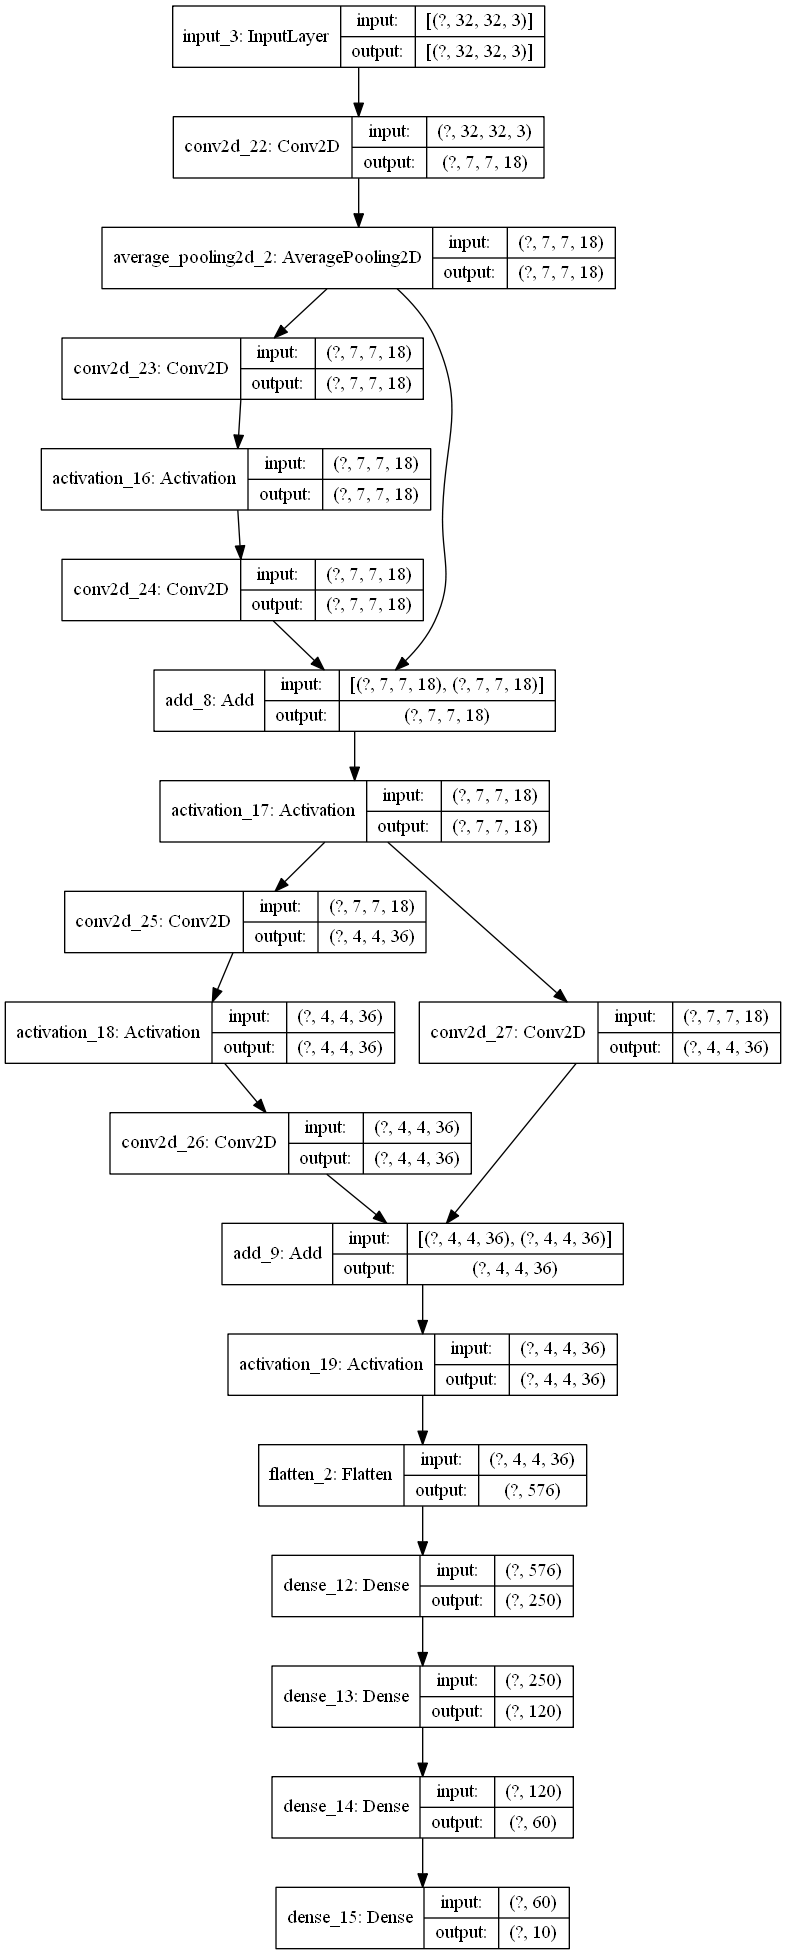

In [27]:
plot_model(model, show_shapes=True)

In [28]:
model.fit(train_x, train_y, epochs=5, validation_data=(val_x, val_y))

Train on 50000 samples, validate on 5000 samples
Epoch 1/5
50000/50000 [==============================] - 30s 607us/sample - loss: 1.7263 - accuracy: 0.3782 - val_loss: 1.5375 - val_accuracy: 0.4484
Epoch 2/5
50000/50000 [==============================] - 30s 602us/sample - loss: 1.5311 - accuracy: 0.4538 - val_loss: 1.4140 - val_accuracy: 0.4892
Epoch 3/5
50000/50000 [==============================] - 30s 606us/sample - loss: 1.4566 - accuracy: 0.4781 - val_loss: 1.3546 - val_accuracy: 0.5142
Epoch 4/5
50000/50000 [==============================] - 31s 610us/sample - loss: 1.4098 - accuracy: 0.4958 - val_loss: 1.3178 - val_accuracy: 0.5350
Epoch 5/5
50000/50000 [==============================] - 31s 613us/sample - loss: 1.3705 - accuracy: 0.5115 - val_loss: 1.2900 - val_accuracy: 0.5498


In [29]:
model.evaluate(test_x, test_y)

10000/10000 [==============================] - 2s 231us/sample - loss: 1.4264 - accuracy: 0.5026


[1.4264014587402343, 0.5026]

In [30]:
model.evaluate(train_x, train_y)

50000/50000 [==============================] - 11s 230us/sample - loss: 1.3226 - accuracy: 0.5324


[1.3225809895324707, 0.53238]